# Step 2: Data Cleaning and Preparation

## 1. What is the meaning of each column?

1) `p_id`: id of the product
2) `p_name`: name of the product
3) `p_id_shop`: shop id that sells the product
4) `p_shop_name`: shop name that sells the product
5) `p_brand` : brand of the product
6) `p_categories`: category of the product
7) `p_day_created`: number of days the product was created since data collection
8) `p_sold_quantity`: number of products sold
9) `p_original_price`: original price of the product
10) `p_current_price`: current price of the product
11) `p_discount_rate` : discount rate of the product

#### Importing libraries needed for this step


In [1]:
import numpy as np
import pandas as pd

#### Reading the data 

In [2]:
tiki_data = pd.read_csv('../../../data/raw/products_detail.csv')   
tiki_data.head()

,p_id,p_name,p_id_shop,p_shop_name,p_brand,p_categories,p_day_created,p_sold_quantity,p_original_price,p_current_price,p_discount_rate
0,83412126,Bình Giữ Nhiệt Lock&Lock Energetic One-Touch T...,38510.0,JoyMall LocknLock Chính Hãng,LocknLock,Bình giữ nhiệt,659.0,702,528000,269000,49
1,53789448,"Bộ cây lau nhà tự vắt thông minh, chổi lau nhà...",96639.0,Parroti Store,Parroti,Nhà Cửa - Đời Sống,974.0,12844,799000,429000,46
2,212830295,( hàng sẵn )squyshi to bự,318926.0,Squishy,OEM,Root,8.0,0,59000,59000,0
3,13334313,Bộ 6 chén (bát) cơm sứ phong cách Nhật Bản hoa...,3340.0,Công ty TNHH TM Minh Gia Lợi,OEM,Nhà Cửa - Đời Sống,1372.0,938,209000,209000,0
4,99868980,Bình Giữ Nhiệt Locknlock Bucket Tumbler LHC426...,1.0,Tiki Trading,LocknLock,Bình giữ nhiệt,593.0,10359,473000,235000,50


#### Understanding the data 

In [3]:
tiki_data.shape

(1976, 11)

In [4]:
tiki_data.describe()

,p_id,p_id_shop,p_day_created,p_sold_quantity,p_original_price,p_current_price,p_discount_rate
count,1.976000e+03,1972.000000,1968.000000,1976.000000,1.976000e+03,1.976000e+03,1976.000000
mean,1.137176e+08,118776.864604,994.444614,611.413968,4.448611e+05,3.576897e+05,16.437247
std,6.390670e+07,95339.355321,16623.927494,1577.594227,2.708963e+06,2.466523e+06,19.897360
min,3.729300e+05,1.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,5.796516e+07,25156.000000,259.000000,33.000000,4.987500e+04,4.375000e+04,0.000000
50%,1.157376e+08,109746.000000,521.000000,154.000000,1.250000e+05,1.080000e+05,4.000000
75%,1.749457e+08,189957.750000,904.000000,549.500000,2.890000e+05,2.100000e+05,35.000000
max,2.139635e+08,320802.000000,737825.000000,23009.000000,6.890000e+07,6.890000e+07,95.000000


## 2. What is the current data type of each column? Are there columns having inappropriate data types?

In [5]:
tiki_data.dtypes

p_id                  int64
p_name               object
p_id_shop           float64
p_shop_name          object
p_brand              object
p_categories         object
p_day_created       float64
p_sold_quantity       int64
p_original_price      int64
p_current_price       int64
p_discount_rate       int64
dtype: object

There are 4 columns with the datatype of `object`: "p_name", "p_category", "p_shop_name", "p_branch". In Pandas, `object` types usually refer to strings. And this is not an exception in this case. 

In [6]:
def open_object_dtype(s):
    dtypes = set(s.apply(type))
    return dtypes

In [7]:
print(open_object_dtype(tiki_data['p_name']))
print(open_object_dtype(tiki_data['p_categories']))
print(open_object_dtype(tiki_data['p_shop_name']))
print(open_object_dtype(tiki_data['p_brand']))

{<class 'str'>}
{<class 'str'>, <class 'float'>}
{<class 'str'>, <class 'float'>}
{<class 'str'>, <class 'float'>}


In [8]:
tiki_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1976 entries, 0 to 1975
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   p_id              1976 non-null   int64  
 1   p_name            1976 non-null   object 
 2   p_id_shop         1972 non-null   float64
 3   p_shop_name       1972 non-null   object 
 4   p_brand           1975 non-null   object 
 5   p_categories      1972 non-null   object 
 6   p_day_created     1968 non-null   float64
 7   p_sold_quantity   1976 non-null   int64  
 8   p_original_price  1976 non-null   int64  
 9   p_current_price   1976 non-null   int64  
 10  p_discount_rate   1976 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 169.9+ KB


In [9]:
# split category from p_categories column 
category = tiki_data['p_categories'].str.split(',', expand=True)
tiki_data.drop(['p_categories'], axis=1, inplace=True)
tiki_data.insert(2, 'p_categories', category[0])
tiki_data.head()

,p_id,p_name,p_categories,p_id_shop,p_shop_name,p_brand,p_day_created,p_sold_quantity,p_original_price,p_current_price,p_discount_rate
0,83412126,Bình Giữ Nhiệt Lock&Lock Energetic One-Touch T...,Bình giữ nhiệt,38510.0,JoyMall LocknLock Chính Hãng,LocknLock,659.0,702,528000,269000,49
1,53789448,"Bộ cây lau nhà tự vắt thông minh, chổi lau nhà...",Nhà Cửa - Đời Sống,96639.0,Parroti Store,Parroti,974.0,12844,799000,429000,46
2,212830295,( hàng sẵn )squyshi to bự,Root,318926.0,Squishy,OEM,8.0,0,59000,59000,0
3,13334313,Bộ 6 chén (bát) cơm sứ phong cách Nhật Bản hoa...,Nhà Cửa - Đời Sống,3340.0,Công ty TNHH TM Minh Gia Lợi,OEM,1372.0,938,209000,209000,0
4,99868980,Bình Giữ Nhiệt Locknlock Bucket Tumbler LHC426...,Bình giữ nhiệt,1.0,Tiki Trading,LocknLock,593.0,10359,473000,235000,50


## 3. With each column, how are values distributed?
-  We will do the following steps: 
1. Fixing invalid values
2. Checking duplicates and removing them 
3. Checking missing values and removing them

#### 1. Fixing invalid values

In [10]:
tiki_data['p_name'].unique()

array(['Bình Giữ Nhiệt Lock&Lock Energetic One-Touch Tumbler LHC3249 - 550ML',
       'Bộ cây lau nhà tự vắt thông minh, chổi lau nhà 360 độ, lau sạch khô nhanh - Parroti Pro PR01',
       '( hàng sẵn )squyshi to bự', ...,
       'Bộ 6 nĩa inox 304 DandiHome 2020 cao cấp, sang trọng, tinh tế',
       'Cưa cành cây gấp gọn cưa đa năng Nhật Bản',
       'Cưa Cầm Tay Lưỡi Thẳng Deli Chính Hãng - Lưỡi Cưa Kim Loại Chắc Chắn, Sắc Bén - Bao Bảo Vệ An Toàn - DL580924'],
      dtype=object)

<AxesSubplot:>

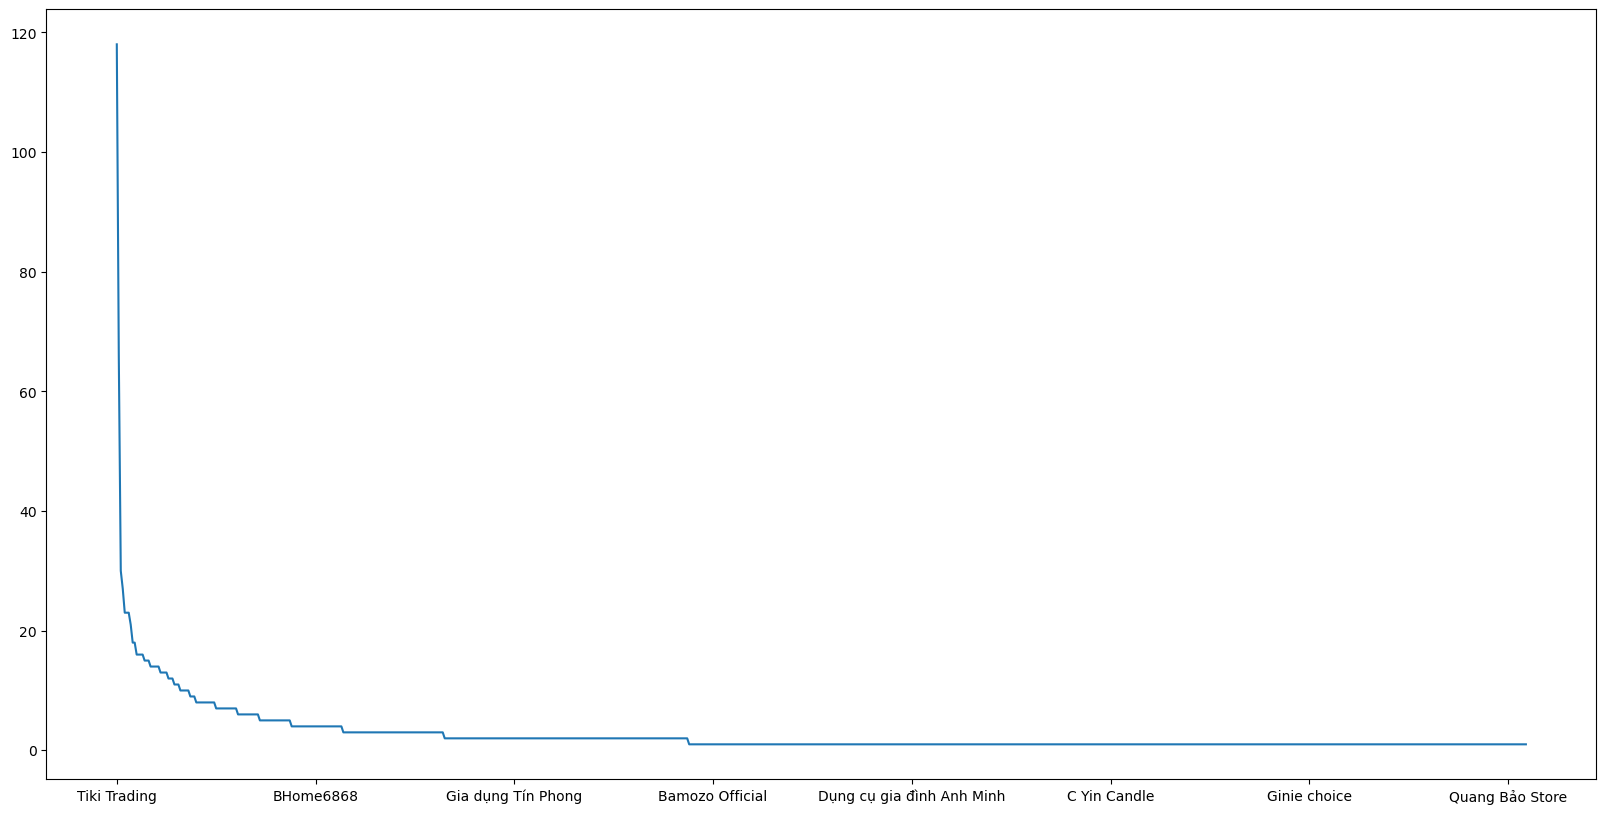

In [11]:
tiki_data['p_shop_name'].value_counts().plot(kind='line', figsize=(20, 10)) 

In [13]:
tiki_data['p_categories'].unique()

array(['Bình giữ nhiệt', 'Nhà Cửa - Đời Sống', 'Root', 'Bộ ga', 'Giá',
       'Phụ kiện nhà bếp khác', 'Ổ cắm', 'Dụng cụ xay', 'Hạt giống',
       'Thùng rác', 'Hộp đựng thực phẩm', 'Dụng cụ lau nhà khác',
       'Sofa/ salon và phụ kiện', 'Dụng cụ Cắt-Gọt-Bào', 'Khăn',
       'Nội thất phòng ngủ khác', 'Ly', 'Trang trí nhà cửa khác',
       'Lư trầm', 'Chảo các loại', 'Pin tiểu', 'Dao các loại', 'Bàn chải',
       'Nội thất phòng học', 'Khác', 'Kệ & Tủ', 'Ron', 'Đèn khác',
       'Phân bón', 'Vỏ gối', 'Bàn ghế làm việc', 'Chổi', 'Chăn',
       'Túi đựng rác', 'Bóng đèn', 'Phụ kiện phòng ngủ khác',
       'Dụng cụ vệ sinh khác', 'Phụ kiện giặt ủi khác', 'Tủ', 'Đèn bàn',
       'Đèn diệt côn trùng', 'Thảm chùi chân',
       'Vòi nước và phụ kiện tưới cây', 'Chiếu', 'Áo mưa',
       'Dụng cụ diệt côn trùng khác', 'Gối các loại', 'Đồng hồ để bàn',
       'Ruột gối', 'Chậu', 'Màng nhôm', 'Cây lăn bụi', 'Kệ nhà bếp',
       'Túi giặt', 'Móc treo', 'Bình đựng nước', 'Hóa chất', 'Xửng hấp',
 

#### As we can see, there are categories named "Root" and "Giá" not mean as a category. 

In [15]:
# count number of category have name 'Root'
print(tiki_data['p_categories'].value_counts()['Root'])

# count number of category have name 'Giá'
print(tiki_data['p_categories'].value_counts()['Giá'])

141
42


#### The number of categories named "Root" and "Giá" is quite small (166+38/2000), So to avoid data confusion, we will delete it.

In [16]:
# drop row have category name 'Root' or "Giá"
tiki_data = tiki_data[tiki_data['p_categories'] != 'Root']
tiki_data = tiki_data[tiki_data['p_categories'] != 'Giá']

In [17]:
tiki_data.shape

(1793, 11)

#### As we know, in terms of product price (p_original_price) there is almost no price of 0. So we will check our data has such values.

In [19]:
count = 0

for x in tiki_data.index:
  if tiki_data.loc[x, "p_original_price"] == 0:
    count += 1
    print(tiki_data.loc[x, :])

count

p_id                                                        188141191
p_name              Khăn lau mặt Khăn tắm Sợi bông Mềm mại Thấm nư...
p_categories                                                      NaN
p_id_shop                                                         NaN
p_shop_name                                                       NaN
p_brand                                                      CHIKIGON
p_day_created                                                   191.0
p_sold_quantity                                                     0
p_original_price                                                    0
p_current_price                                                 55000
p_discount_rate                                                     0
Name: 406, dtype: object
p_id                                                          1651191
p_name              Kệ Đỡ Màn Hình Máy Tính Monitor Stand Walnut P...
p_categories                                                     

5

#### As we can see above, the products have a price(p_original_price) of 0. So we will delete these rows.

In [20]:
# drop row have p_original_price = 0
tiki_data = tiki_data[tiki_data['p_original_price'] != 0]

In [21]:
count = 0

for x in tiki_data.index:
  if tiki_data.loc[x, "p_original_price"] == 0:
    count += 1
    print(tiki_data.loc[x, :])

count

0

### 2. Checking duplicates and removing them

<AxesSubplot:>

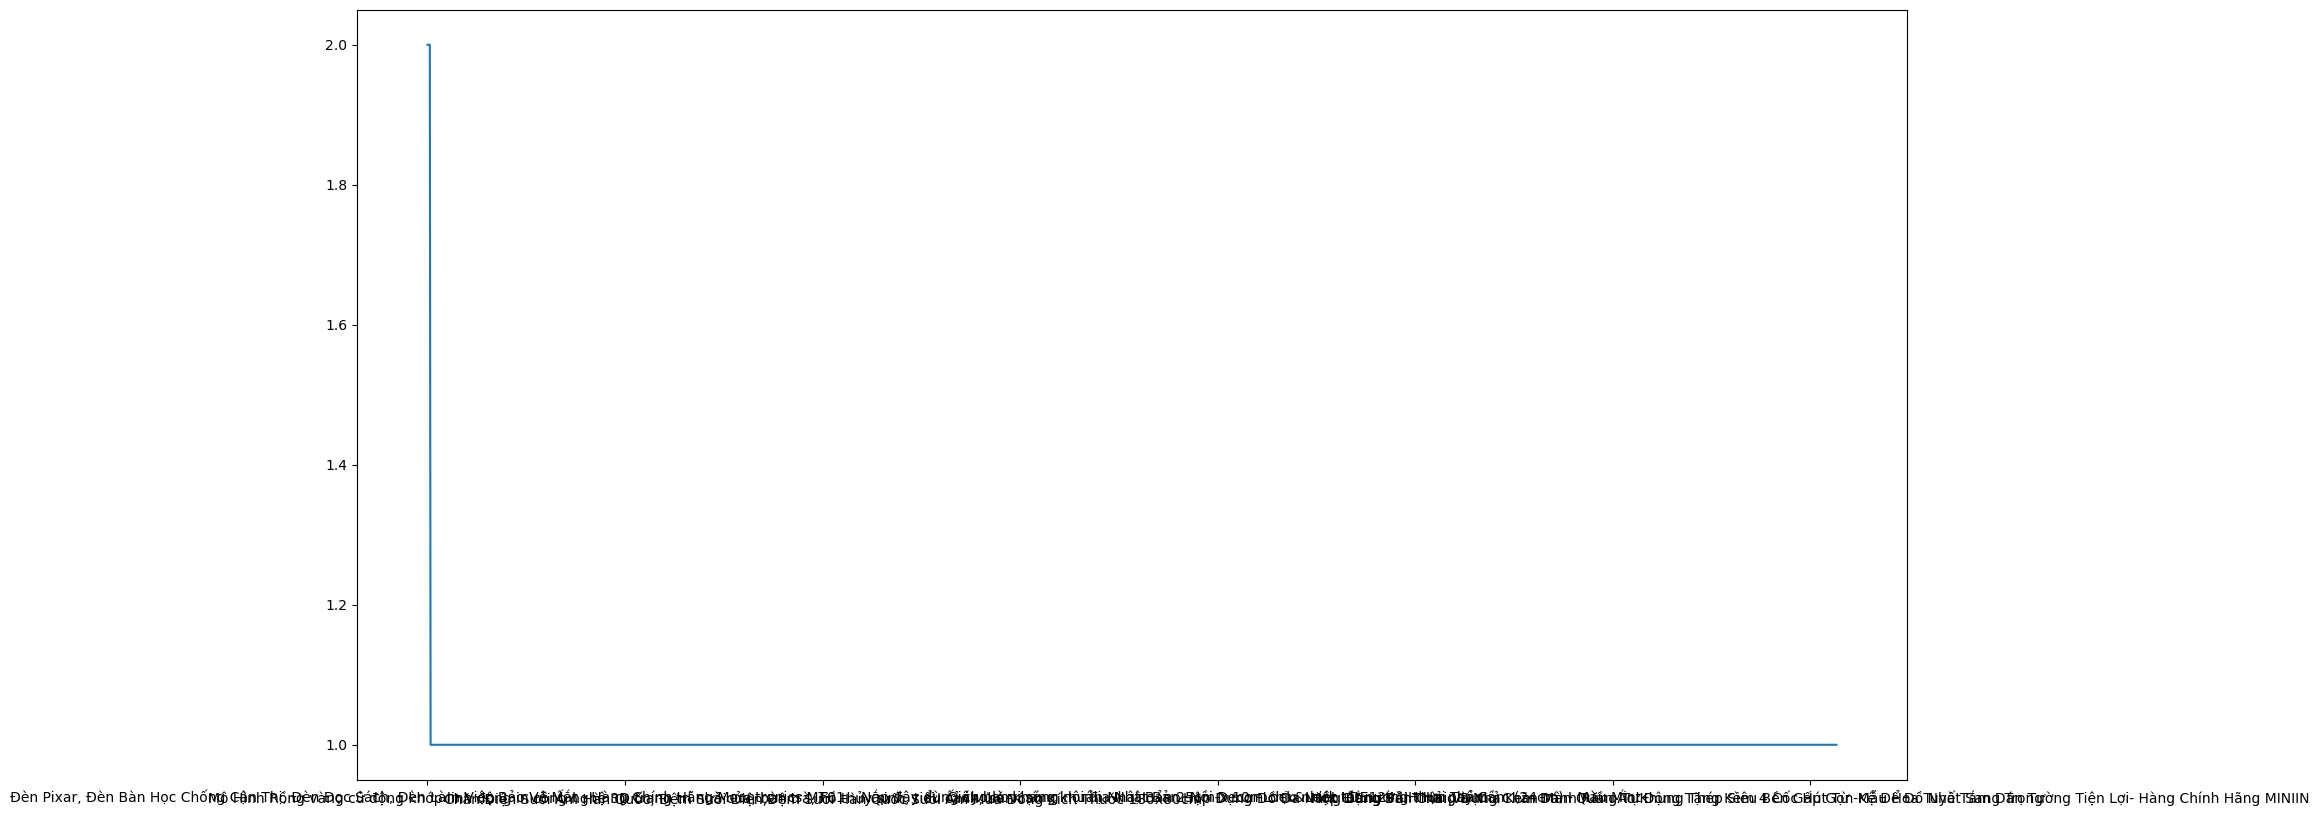

In [22]:
tiki_data['p_name'].value_counts().plot(kind='line', figsize=(20, 10))

#### We see that the number of identical elements of the name column is only 1!!! so keeping it as it is won't mess up the data

### 3. Checking missing values and removing them

In [23]:
tiki_data.isnull().sum()

p_id                0
p_name              0
p_categories        0
p_id_shop           0
p_shop_name         0
p_brand             1
p_day_created       8
p_sold_quantity     0
p_original_price    0
p_current_price     0
p_discount_rate     0
dtype: int64

#### When processing p_origin_price = 0, we see that even p_category, p_id_shop, p_shop_name have NaN values, but because of deleting those rows, the NaN values in these columns have disappeared. Lucky!!!

#### Currently, there are still a few products with unknown date of creation, so we will delete them to avoid misinterpretation of the data, along with deleting more products with null brand names.

In [24]:
tiki_data.dropna(subset=['p_day_created', 'p_brand'], inplace=True)
tiki_data.isnull().sum()


p_id                0
p_name              0
p_categories        0
p_id_shop           0
p_shop_name         0
p_brand             0
p_day_created       0
p_sold_quantity     0
p_original_price    0
p_current_price     0
p_discount_rate     0
dtype: int64

In [25]:
# save data to csv file
tiki_data.to_csv('../../../data/processed/tiki_data.csv', index=False)